# Begin by importing the neccessary packages


In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
import nltk # for text and setiment analysis
import nltk, re, pprint
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from stop_words import get_stop_words  # to get 'meat' of words in project names
from nltk.corpus import stopwords

# Read in the Kickstarter data

In [2]:
ks = pd.read_csv('/Users/hannah1ross/Desktop/dataforgood/data/ks-projects-201801.csv')
ks.dropna(inplace = True)

ks.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


# Q:  What are the most common words are in Kickstarter project names?

* To inspect the common words in kickstart project names, we will make a word cloud of words in project names.

### First, we will collect a list of every project name

In [3]:
names_list = [title for title in ks['name']]

names_list[0:3] # a list where each item is a project name from out data set

all_names_text = ' '.join(names_list)

all_names_text[0:200] # we see that now we have converted all project names into one continious body of text ( one string of text)

'The Songs of Adelaide & Abullah Greeting From Earth: ZGAC Arts Capsule For ET Where is Hank? ToshiCapital Rekordz Needs Help to Complete Album Community Film Project: The Art of Neighborhood Filmmakin'

### Now that we have a body of text with all the names, we define a function that will produce a word cloud for a given body of text

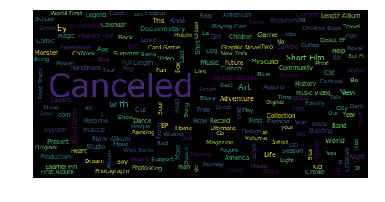

In [4]:
def generate_wordcloud(text): 
    wordcloud = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                          relative_scaling = 1.0,
                          stopwords = {'to', 'of','the','for','in','and','a','an','project'} # exclude project, and do not count common words
                          ).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(all_names_text) # word cloud for all names of projects

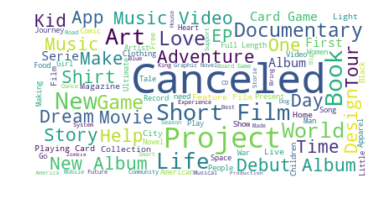

In [5]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_names_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Q: Why is 'Canceled' the most common word occuring in project names? 

## Extract all of the project names that have the word 'canceled' in them

In [6]:
keep_with_c = []
for i in range(len(names_list)):
    sent_words = word_tokenize(names_list[i])
    if "Canceled" in sent_words:
        keep_with_c.append(names_list[i])

# Inspect what some of these project names are with the word 'canceled'.

In [7]:
keep_with_c[0:12] # take a peak

['STUDIO IN THE SKY - A Documentary Feature Film (Canceled)',
 'Raise the Woof, expanding the love (Canceled)',
 'Glyscian Debut Album Recording (Canceled)',
 'Fishtacular - The Ultimate Fishing Tool (Canceled)',
 'The JANIS JOPLIN Project (Canceled)',
 'Objecthood: A Story of an Imagined Economy (Canceled)',
 'Mutant Plants: A Guide (Canceled)',
 'Danger!  Extreme Lawn Darts (Canceled)',
 'The Project Unknown (Canceled)',
 'Riposte (Canceled)',
 'TimeChat™ (Canceled)',
 'Audience of Death (Canceled)']

## It seems like project names are getting updated with an appended '(Canceled)'. We assume that this means the project has been canceled, but we will check the status of these projects to be sure

In [8]:
'''
canceled_proj = []
for i in range(len(ks.state)):
    cur_state = ks.state[i]
    cur_name = ks.name[i]
    if cur_state == 'canceled':
        canceled_proj.append(cur_name)
'''
        

"\ncanceled_proj = []\nfor i in range(len(ks.state)):\n    cur_state = ks.state[i]\n    cur_name = ks.name[i]\n    if cur_state == 'canceled':\n        canceled_proj.append(cur_name)\n"

# There is a mistake indexing row 169 in the data, so we inspect and see that this is because the data actually is missing a row 169. It jumps from 168 to 170 because when we removed missing values this row was removed.


In [9]:
ks.head(170)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00



### We can reindex the data to avoid this loop issue

In [10]:
ks = ks.reset_index(drop=True)

canceled_proj = []
for i in range(len(ks.state)):  
    cur_state = ks.state[i]
    cur_name = ks.name[i]
    if cur_state == 'canceled':
        canceled_proj.append(cur_name)

## We see that some of the canceled projects have (Canceled) appended to the end of their name, but not all canceled projects do.

In [11]:
canceled_proj[0:5] # we see that some of the canceled projects have Canceled appended to their name, but not all of them do

['Community Film Project: The Art of Neighborhood Filmmaking',
 'SPIN - Premium Retractable In-Ear Headphones with Mic',
 'STUDIO IN THE SKY - A Documentary Feature Film (Canceled)',
 'Raise the Woof, expanding the love (Canceled)',
 'Gizbee™ Unlimited Removable Storage for Your Travel Photos']

# Since the appended (Canceled) is not a word indicative of common themes in the projects, we will make another word cloud now excluding this word in hopes of gaining more insight into common words used in names as a clue to what names have in common.

## • To do this, we create a new list of project names that excludes project names that have the word canceled. 

## • Also, as a measure to avoid redundecy, we convet all words to lower case so that words like "Film" and 'film' are not counted as two different words. This way we can evaluate prominent sentiment in the project names

# • Also, we want to remove all punctuation, so we will use Natural Language Toolkit for more indepth text analysis tools to inspect common words in project names.

In [12]:
words_in_names = nltk.word_tokenize(all_names_text)

# •  Convert all words to lowercase letters to avoid unneccessary word redundency

In [13]:
words_in_names_lower = [word.lower() for word in words_in_names]


# •  Make sure all tokenized words from the project names are actual words and not punctuation

In [14]:
words_in_names_lower_alpha = [word for word in words_in_names_lower if word.isalpha()]

# • Remove "canceled" from the text of words

In [15]:
words_in_names_no_c = [word for word in words_in_names_lower_alpha if word != 'canceled']

# • Remove all fluff words by leveraging stop words from nltk (removes prepositions, articles, etc.)

In [16]:

stop_words = list(get_stop_words('en'))         #Have around 900 stopwords
nltk_words = list(stopwords.words('english'))   #Have around 150 stopwords
stop_words.extend(nltk_words)

meaningful_words_list = []
for word in words_in_names_no_c:
    if not word in stop_words:
        meaningful_words_list.append(word)

meaningful_words_text = ' '.join(meaningful_words_list)

# Now that we have cleaned up the body of words included in project names to be all lower case, not 'canceled', and not redundant or 'fluff' words, we make a new word cloud to see common words in project names

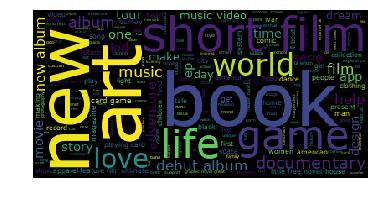

In [17]:
generate_wordcloud(meaningful_words_text)

### From this word cloud, we see that project names contain words that reflect what their categories are. We suspected that maybe there would be a trend of action words like 'help' or 'support' included in project names, but this does not seeem to suggest that this is so.


# Given the meaningful words that make up the project names, we can compute the word frequency distribution to see which words are most common in project names.

In [18]:
#fdist = nltk.FreqDist(meaningful_words_cleaned)

In [19]:
fdist = nltk.FreqDist(meaningful_words_list)

##  Now that we have a frequency distribution we can check the occurance of each word by indexing it like a dictionary.

# Q: Who has more projects, UCLA or USC?

## • We use inspect the frequency distribution to see how often 'UCLA' and 'USC' appear in project names.

In [20]:
print("UCLA Occurs ",fdist['ucla'],"times.")

print("USC Occurs ", fdist['usc'], "times.")

UCLA Occurs  9 times.
USC Occurs  66 times.


## UCLA appears in 9 kickstarter project names. We inspect these names that include UCLA to see what these projects are about.

#### • To inspect project names that include these key words, we tokenize the project names into phrases.

In [21]:
ucla_in_name = []
for i in range(len(names_list)):
    sent_words = word_tokenize(names_list[i])
    sent_words = [w.lower() for w in sent_words]
    if "ucla" in sent_words:
        ucla_in_name.append(names_list[i])

ucla_in_name

['C.O.N.C.A. Go to UCLA',
 'Solo exhibitions & Research at UCLA Medical Center & USC',
 '"A Long Day"- A UCLA Graduate Thesis Film',
 'UCLA Bruin Harmony takes on another album!',
 'Shakespeare at UCLA presents Twelfth Night: Or What You Will',
 'UCLA Thesis Preview, Berlin Debut!',
 "Scottie's UCLA Thesis Production",
 'UCLA RT3DA and VR Games Showcase',
 'The Martyr - UCLA 35mm Thesis Film tackling Islamophobia']

# Lets inspect more about what these projects related to UCLA. 

# How successful are UCLA projects? 

# What is the category distribution of UCLA projects? 

In [22]:
ucla_states = {'project':[],'state':[],'category':[],'main_category':[]}
for i in range(len(ks.name)):
    if ks.name[i] in ucla_in_name:
        cur = ks.name[i]
        ucla_states['project'].append(cur)
        ucla_states['state'].append(ks.state[i])
        ucla_states['category'].append(ks.category[i])
        ucla_states['main_category'].append(ks.main_category[i])

ucla_states = pd.DataFrame(ucla_states)
ucla_states

,project,state,category,main_category
0,C.O.N.C.A. Go to UCLA,failed,Poetry,Publishing
1,Solo exhibitions & Research at UCLA Medical Ce...,successful,Performance Art,Art
2,"""A Long Day""- A UCLA Graduate Thesis Film",failed,Shorts,Film & Video
3,UCLA Bruin Harmony takes on another album!,successful,Music,Music
4,Shakespeare at UCLA presents Twelfth Night: Or...,successful,Theater,Theater
5,"UCLA Thesis Preview, Berlin Debut!",successful,Art,Art
6,Scottie's UCLA Thesis Production,successful,Shorts,Film & Video
7,UCLA RT3DA and VR Games Showcase,successful,Video Games,Games
8,The Martyr - UCLA 35mm Thesis Film tackling Is...,successful,Drama,Film & Video


In [51]:
ucla_states = pd.DataFrame(ucla_states)
ucla_states

,project,state,category,main_category
0,C.O.N.C.A. Go to UCLA,failed,Poetry,Publishing
1,Solo exhibitions & Research at UCLA Medical Ce...,successful,Performance Art,Art
2,"""A Long Day""- A UCLA Graduate Thesis Film",failed,Shorts,Film & Video
3,UCLA Bruin Harmony takes on another album!,successful,Music,Music
4,Shakespeare at UCLA presents Twelfth Night: Or...,successful,Theater,Theater
5,"UCLA Thesis Preview, Berlin Debut!",successful,Art,Art
6,Scottie's UCLA Thesis Production,successful,Shorts,Film & Video
7,UCLA RT3DA and VR Games Showcase,successful,Video Games,Games
8,The Martyr - UCLA 35mm Thesis Film tackling Is...,successful,Drama,Film & Video


# Q: Overall, how successful are UCLA Kickstarter projects?

In [36]:
ucla_scores=pd.DataFrame(ucla_states.groupby('state')['state'].count())
ucla_scores.columns = ['Number of UCLA Projects']
ucla_scores



,Number of UCLA Projects
state,
failed,2
successful,7


In [24]:
ucla_scores_percents = ucla_scores/ucla_scores['Number of UCLA Projects'].sum()
ucla_scores_percents.columns = ['Percent of UCLA Projects']
ucla_scores_percents

,Percent of UCLA Projects
state,
failed,0.222222
successful,0.777778


In [37]:
ucla_scores_percents = ucla_scores/ucla_scores['Number of UCLA Projects'].sum()
ucla_scores_percents.columns = ['Percent of UCLA Projects']
ucla_scores_percents

,Percent of UCLA Projects
state,
failed,0.222222
successful,0.777778


# We can see that UCLA projects have a 77.77% success rate.

# Q: What is the distribution of categories for UCLA projects?

In [25]:
ucla_maincats=pd.DataFrame(ucla_states.groupby('main_category')['main_category'].count())

ucla_maincats.columns = ['Number of UCLA Projects']

ucla_maincats_percents = ucla_maincats/ucla_maincats['Number of UCLA Projects'].sum()

ucla_maincats_percents.columns = ['Percent of UCLA Projects']

ucla_maincats_percents

,Percent of UCLA Projects
main_category,
Art,0.222222
Film & Video,0.333333
Games,0.111111
Music,0.111111
Publishing,0.111111
Theater,0.111111


In [26]:
ucla_maincats_percents = ucla_maincats/ucla_maincats['Number of UCLA Projects'].sum()

ucla_maincats_percents.columns = ['Percent of UCLA Projects']

ucla_maincats_percents

,Percent of UCLA Projects
main_category,
Art,0.222222
Film & Video,0.333333
Games,0.111111
Music,0.111111
Publishing,0.111111
Theater,0.111111


# Over 33% of UCLA's projects are in a film category.

In [268]:
ucla_maincats_percents.columns = ['Percent of UCLA Projects']

In [269]:
ucla_maincats_percents

,Percent of UCLA Projects
main_category,
Art,0.222222
Film & Video,0.333333
Games,0.111111
Music,0.111111
Publishing,0.111111
Theater,0.111111


# Now, lets do a similar analysis of USC Kickstarter projects.

In [51]:
usc_in_name = []
for i in range(len(names_list)):
    sent_words = word_tokenize(names_list[i])
    sent_words = [w.lower() for w in sent_words]
    if "usc" in sent_words:
        usc_in_name.append(names_list[i])

usc_in_name = pd.DataFrame(usc_in_name)
usc_in_name.columns = ['Project Name']
usc_in_name

,Project Name
0,The Process - A USC Thesis Film
1,The History Boys at USC
2,It's Better In Italian - A USC Documentary Thesis
3,"USC Alumnus, Robert Amerson: Making Waves (A S..."
4,Lonely as God - A USC Thesis Film
5,TEN THOUSAND MILES - A USC Thesis Film
6,USC Korean Culture Night 2012
7,Reunion: A USC Thesis Film
8,M for Mediocrity : a USC Student Short Film
9,Pocketful of Posy USC Grad Film


# How does U\$C fair in its success rate of Kickstarter projects.

# What is USC's disctribution of projects across categories?

In [52]:
len(usc_in_name)

66

In [62]:
usc_in_name

['The Process - A USC Thesis Film',
 'The History Boys at USC',
 "It's Better In Italian - A USC Documentary Thesis",
 'USC Alumnus, Robert Amerson: Making Waves (A Studio Album)',
 'Lonely as God - A USC Thesis Film',
 'TEN THOUSAND MILES - A USC Thesis Film',
 'USC Korean Culture Night 2012',
 'Reunion: A USC Thesis Film',
 'M for Mediocrity : a USC Student Short Film',
 'Pocketful of Posy USC Grad Film',
 "I'll Be Seeing You (A USC Student Production)",
 'Mammoth - a USC Thesis Film',
 'Francis - A USC Thesis Film',
 '"DAD" - A USC Short Film',
 'Faith Need Not Change Her Gown - A USC MFA Thesis Film',
 'ROYA - A USC MFA Thesis Film',
 'Lark, a USC Short Film',
 'CHICAGO The Musical at USC',
 'Dante Falls - A USC MFA Thesis Film',
 'PROTOTYPE - An Afrofuturist USC Thesis Film',
 'Solo exhibitions & Research at UCLA Medical Center & USC',
 'The Best and the Loneliest Days, a USC thesis film',
 'The Party Dress - A USC Graduate Thesis Film',
 'The Three Play Repertory of the USC MFA C

## • By looking at its project names, it seems like most projects are about films, but we will inspect further

In [42]:
usc_states = {'project':[],'state':[],'category':[],'main_category':[]}
for i in range(len(ks.name)):
    if ks.name[i] in usc_in_name:
        cur = ks.name[i]
        usc_states['project'].append(cur)
        usc_states['state'].append(ks.state[i])
        usc_states['category'].append(ks.category[i])
        usc_states['main_category'].append(ks.main_category[i])
        

usc_states=pd.DataFrame(usc_states)

usc_states.head()



,project,state,category,main_category
0,The Process - A USC Thesis Film,successful,Thrillers,Film & Video
1,The History Boys at USC,successful,Plays,Theater
2,It's Better In Italian - A USC Documentary Thesis,successful,Documentary,Film & Video
3,"USC Alumnus, Robert Amerson: Making Waves (A S...",canceled,Rock,Music
4,Lonely as God - A USC Thesis Film,successful,Documentary,Film & Video


# What categories make up USC Kickstarter Projects?

In [46]:
usc_cat=pd.DataFrame(pd.DataFrame(usc_states).groupby('main_category')['main_category'].count())

usc_cat.columns=['Number of USC Projects']
usc_cat

,Number of USC Projects
main_category,
Art,2
Film & Video,55
Food,1
Music,1
Theater,7


In [47]:
usc_cat_scores = pd.DataFrame(usc_cat['Number of USC Projects']/ usc_cat['Number of USC Projects'].sum())

usc_cat_scores.columns=['Percent of USC Projects']

usc_cat_scores

,Percent of USC Projects
main_category,
Art,0.030303
Film & Video,0.833333
Food,0.015152
Music,0.015152
Theater,0.106061


# We see that just over 83% of USC Kickstarter projects are for Film & video.

# Now lets see how successful USC Kickstarter projects are.

In [29]:
usc_scores = pd.DataFrame(usc_states).groupby('state')['state'].count()

usc_scores = pd.DataFrame(usc_scores)
usc_scores.columns = ['Number of USC Projects']

usc_state_scores = pd.DataFrame(usc_scores/ usc_scores['Number of USC Projects'].sum())

usc_state_scores.columns = ['Percent of USC Projects']

usc_state_scores

,Percent of USC Projects
state,
canceled,0.060606
failed,0.106061
successful,0.833333


# We see that about 83% of USC Kickstarter projects are successful.

# To get a distrubtion of phrases rather than key words, we can use fdist on the list of project names.

In [30]:
lower_names_list = [name.lower() for name in names_list]
clean_lower_names_list = [name for name in lower_names_list if 'canceled' not in name] 

fdist2 = nltk.FreqDist(clean_lower_names_list)

# Here are the Top 10 most common phrases in project names

In [31]:
fdist2.most_common()[:10]

[('new ep/music development', 13),
 ('music video', 12),
 ('the journey', 10),
 ('new ep / music development', 10),
 ('my first album', 10),
 ('debut album', 10),
 ('the other side', 9),
 ('choices', 9),
 ("a midsummer night's dream", 9),
 ('reflections', 9)]

# Here are some of the least common phrases in project names.

In [32]:
fdist2.most_common()[-10:]

[('colorado international activism film festival', 1),
 ('date seat - boston ios app', 1),
 ('at the beach', 1),
 ('beach wrestling documentary', 1),
 ('islanda', 1),
 ('homemade fresh dog food, cleveland oh', 1),
 ('the tribe', 1),
 ('walls of remedy- new lesbian romantic comedy feature unlike any other!!',
  1),
 ('biodefense education kit', 1),
 ('nou renmen ayiti!  we love haiti!', 1)]